# Predicting tennis player's rank in ATP ranking

In [ ]:
# question: When to set seed, only at the start of the file ?
# how to write reference ?
# Clearly state the question you will try to answer with your project? We are trying to predict?


### Introduction

As the world's most popular sport, tennis has several professional organizations that provide rankings and records for players. The Association of Tennis Professionals (ATP) maintains these rankings based on players' performances during major tournaments played throughout the year. The dataset used for this project contains detailed match-level data from ATP tournaments from 1968 throughout 2021. These rankings and records are used to determine a player's seed in upcoming tournaments and to award titles such as Player of the Year and Most Improved Played. 

The primary objective of our project is to predict the ranking of tennis players by utilizing different factors of the data obtained from ATP tournaments from 2017 to 2019. The factors we used to calculate the prediction are:

1. Player's age
    
2. Player’s height
    
3. Prize money player received

The reason for choosing these 3 variables will be discussed in preliminary exploratory data analysis.


The dataset used in this project was used to train our model to analyze the dataset in order to answer the following question: "Can we accurately predict a tennis player's ranking based on their age, height, and the amount of prize money they received?"

Source of our data came from Ultimate Tennis Statistics, a reputable online platform recognized for its extensive collection of up-to-date tennis statistics. It provides access to the latest match results, in-match statistics, records, and all-time great comparisons, making it a reliable source of information for research in the field of tennis. The directory was pulled from website https://www.ultimatetennisstatistics.com/ (https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTnLinks).

### Preliminary exploratory data analysis


In [1]:

# loading libraries

library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(stringr)
library(ggplot2)
library(scales)

set.seed(420)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
##choosen dataset:
tennis_stats_data <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")

##rename the columes name so that there is no spaces
colnames(tennis_stats_data) = make.names(colnames(tennis_stats_data))
tennis_stats_data

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current.Rank,Best.Rank,Name,Backhand,Prize.Money,⋯,Facebook,Twitter,Nicknames,Grand.Slams,Davis.Cups,Web.Site,Team.Cups,Olympics,Weeks.at.No..1,Tour.Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
495,20 (13-04-1999),France,Right-handed,Wikipedia,382 (95),380 (11-11-2019),Dan Added,Two-handed,"$57,943",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
496,26 (03-09-1993),Austria,Right-handed,Wikipedia,5 (5890),4 (06-11-2017),Dominic Thiem,One-handed,"$22,132,368 15th all-time leader in earnings",⋯,1.Dominic.Thiem,@ThiemDomi,Dominator,NA,NA,dominicthiem.tennis,NA,NA,NA,NA
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
colnames(tennis_stats_data)

[1] "...1"             "Age"              "Country"          "Plays"           
 [5] "Wikipedia"        "Current.Rank"     "Best.Rank"        "Name"            
 [9] "Backhand"         "Prize.Money"      "Height"           "Favorite.Surface"
[13] "Turned.Pro"       "Seasons"          "Active"           "Current.Elo.Rank"
[17] "Best.Elo.Rank"    "Peak.Elo.Rating"  "Last.Appearance"  "Titles"          
[21] "GOAT.Rank"        "Best.Season"      "Retired"          "Masters"         
[25] "Birthplace"       "Residence"        "Weight"           "Coach"           
[29] "Facebook"         "Twitter"          "Nicknames"        "Grand.Slams"     
[33] "Davis.Cups"       "Web.Site"         "Team.Cups"        "Olympics"        
[37] "Weeks.at.No..1"   "Tour.Finals"

In [16]:

tennis_cleaned_data <- tennis_stats_data |>
                select(Prize.Money, Age, Country, Plays, Backhand, Height, Current.Rank)|>
                mutate(across(Prize.Money: Current.Rank, function(col) {str_extract(col, "^[^ ]+")}))|> #remove any special character and adjust the cellk
                mutate(Prize.Money = as.numeric(gsub("[^0-9.]+", "", Prize.Money)))|> #changing the prize money into number by removing special characters
                mutate(Age = as.numeric(Age))|>
                mutate(across(Height:Current.Rank, as.numeric))|>  # convert chr to dbl for the rest of the columes
                mutate(across(Country:Backhand, as.factor))

tennis_cleaned_data
# Noted that we did not removing the NA variables yet, since there are a lot of them,
#       and if we do so, we will not have enough data to perform a precised prediction



Prize.Money,Age,Country,Plays,Backhand,Height,Current.Rank
<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
NA,26,Brazil,Right-handed,NA,NA,378
59040,18,United,Left-handed,Two-handed,NA,326
3261567,32,Slovakia,Right-handed,Two-handed,185,178
374093,21,"Korea,",Right-handed,Two-handed,NA,236
6091971,27,Australia,Right-handed,Two-handed,193,183
⋮,⋮,⋮,⋮,⋮,⋮,⋮
57943,20,France,Right-handed,Two-handed,NA,382
22132368,26,Austria,Right-handed,One-handed,185,5
NA,23,Netherlands,Left-handed,NA,NA,495


In [5]:
#splitting the data into training set and testing set
tennis_split <- initial_split(tennis_cleaned_data, prop = 0.75, strata = Current.Rank)

tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)


tennis_train
     

Prize.Money,Age,Country,Plays,Backhand,Height,Current.Rank
<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
74927,20,Finland,Right-handed,Two-handed,NA,104
NA,23,Russian,Right-handed,Two-handed,NA,4
1285541,20,Serbia,Right-handed,Two-handed,NA,54
2722314,22,United,Right-handed,Two-handed,NA,34
11912152,32,United,Right-handed,Two-handed,198,45
⋮,⋮,⋮,⋮,⋮,⋮,⋮
354975,32,India,Right-handed,Two-handed,NA,416
57943,20,France,Right-handed,Two-handed,NA,382
NA,23,Netherlands,Left-handed,NA,NA,495


In [6]:
summary_num <-tennis_train |>
                select(where(is.numeric)) |>
                pivot_longer(everything(), names_to = "var", values_to = "val") |>
                filter(!is.na(val)) |>
                group_by(var) |>
                summarise(count = n(), mean = mean(val, na.rm = TRUE)) |>
                mutate(mean = round(mean, digits = 2), percentage_missing = (1- count/373)*100) 


observation_percentage_missing <- summary_num |>
                select(-count, -mean) |>
                mutate(percentage_missing = round(percentage_missing, digits = 2))

observation_percentage_missing 


mean_value <- summary_num |>
                select(-count, -percentage_missing)|>
                mutate(mean = round(mean, digits = 2)) |>
                pivot_wider(names_from = var, values_from = mean) |>
rename("Mean value of Age" = "Age",
         "Mean value of Current Rank" = "Current.Rank",
         "Mean value of Height" = "Height",
         "Mean value of Prize Money" = "Prize.Money")

mean_value



observation_factor <- tennis_train |>
                    select(where(is.factor)) |>
                    pivot_longer(everything(), names_to = "var", values_to = "val") |>
                    filter(!is.na(val)) |>
                    group_by(var) |>
                    summarise(observation_count = n()) |>
                    mutate(na_count = 373 - observation_count)
                    

observation_factor


var,percentage_missing
<chr>,<dbl>
Age,0.00
Current.Rank,0.80
Height,76.68
Prize.Money,19.57


Mean value of Age,Mean value of Current Rank,Mean value of Height,Mean value of Prize Money
<dbl>,<dbl>,<dbl>,<dbl>
25.89,249.01,185.63,2316067


var,observation_count,na_count
<chr>,<int>,<dbl>
Backhand,308,65
Country,373,0
Plays,339,34


In [7]:
# Constant for theme of graph
color_palette <- brewer.pal(12, "Dark2")
opacity <- 0.4


Warning message in brewer.pal(12, "Dark2"):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


First, we want to see how the numeric variable relate to current rank

Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 286 rows containing missing values (geom_point).”


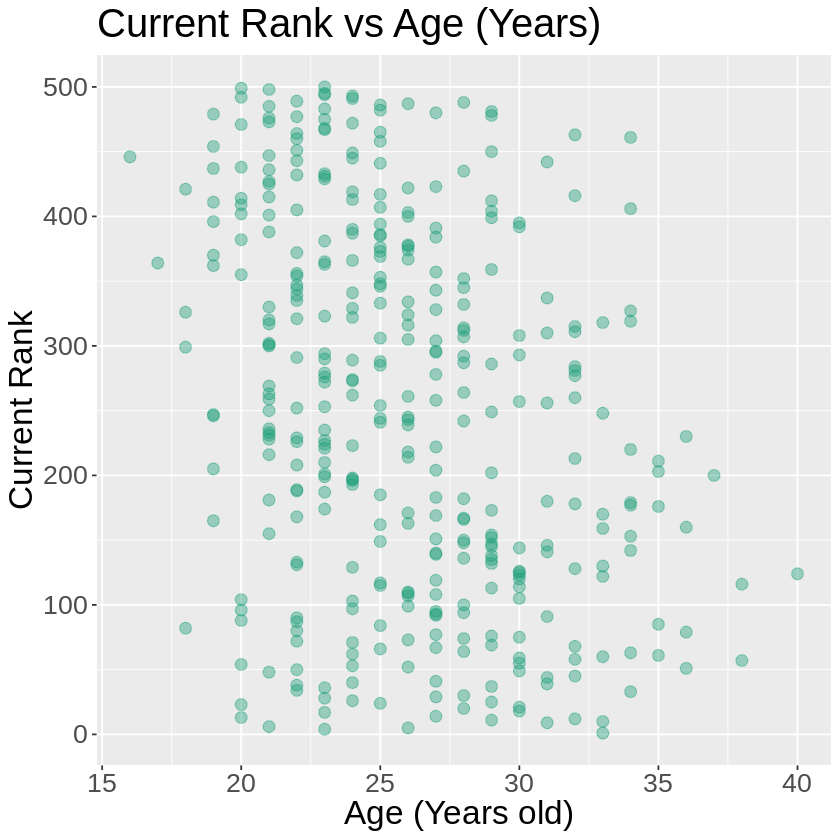

Warning message:
“Removed 73 rows containing missing values (geom_point).”


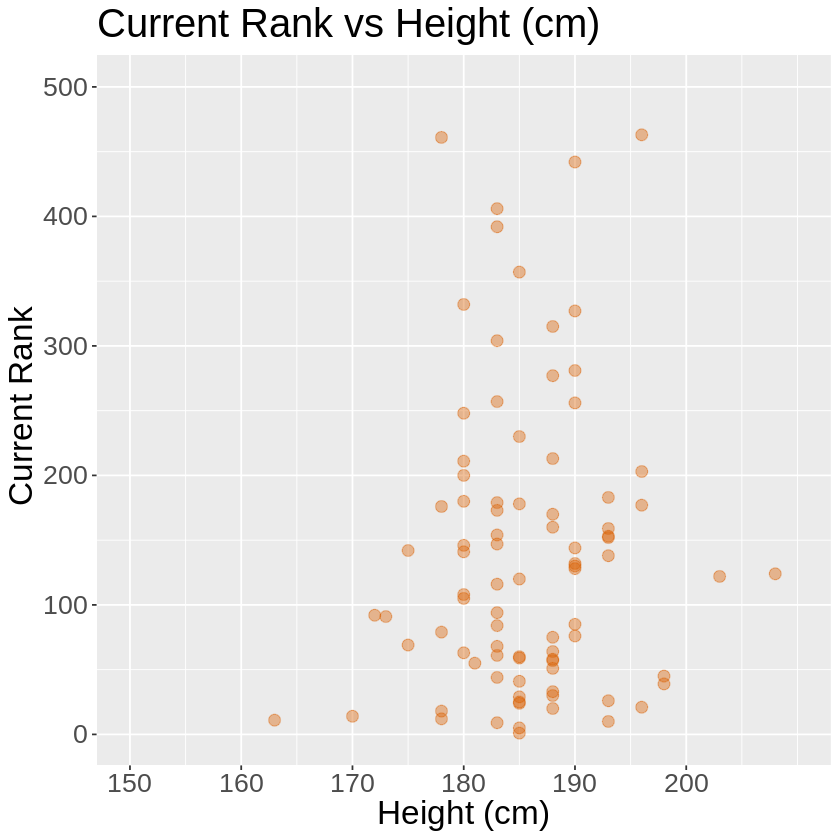

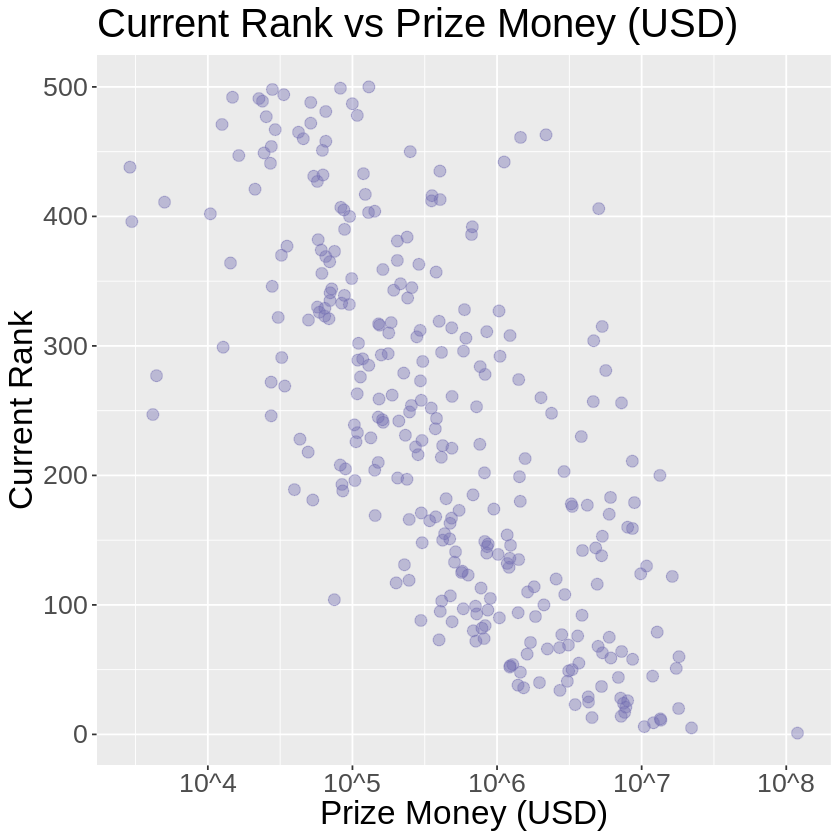

In [8]:
### Visualization Current rank with interesting variable


age_vs_rank <- ggplot(tennis_train, aes(x = Age, y = Current.Rank)) +
  geom_point(alpha = opacity,  color = color_palette[1], size = 3) +
  labs(x = "Age (Years old) ", y = "Current Rank") +
  ggtitle("Current Rank vs Age (Years)") +
  theme(text = element_text(size = 20)) 
age_vs_rank

height_vs_rank <- ggplot(tennis_train, aes(x = Height, y = Current.Rank)) +
  geom_point(alpha = opacity, color = color_palette[2], size = 3) +
  labs(x = "Height (cm)", y = " Current Rank") +
  ggtitle("Current Rank vs Height (cm)") +
  theme(text = element_text(size = 20)) +
  scale_x_continuous(limits = c(150, 210), breaks = seq(150, 200, by = 10))

height_vs_rank



prize_vs_rank <- ggplot(tennis_train, aes(x = Prize.Money, y = Current.Rank)) +
  geom_point(alpha = opacity,  
             color = color_palette[3], 
             size = 3,) +
  labs(x = "Prize Money (USD)", y = "Current Rank") +
  ggtitle("Current Rank vs Prize Money (USD)") +
  scale_x_log10(labels = function(x) sprintf("10^%d", log10(x)), breaks = c(1e3, 1e4, 1e5, 1e6, 1e7, 1e8)) +
  theme(text = element_text(size = 20))

prize_vs_rank






A weak and negative relationship between current rank and age is shown by the graph. 
<br>
A medium and positive relationship between current rank and height is shown by the graph.
<br>
A strong and negative relationship between current rank and height and prize money is shown by the graph.

Next, we want to see how catogrical variable can help predicting the current rank.

Warning message:
“Removed 221 rows containing missing values (geom_point).”


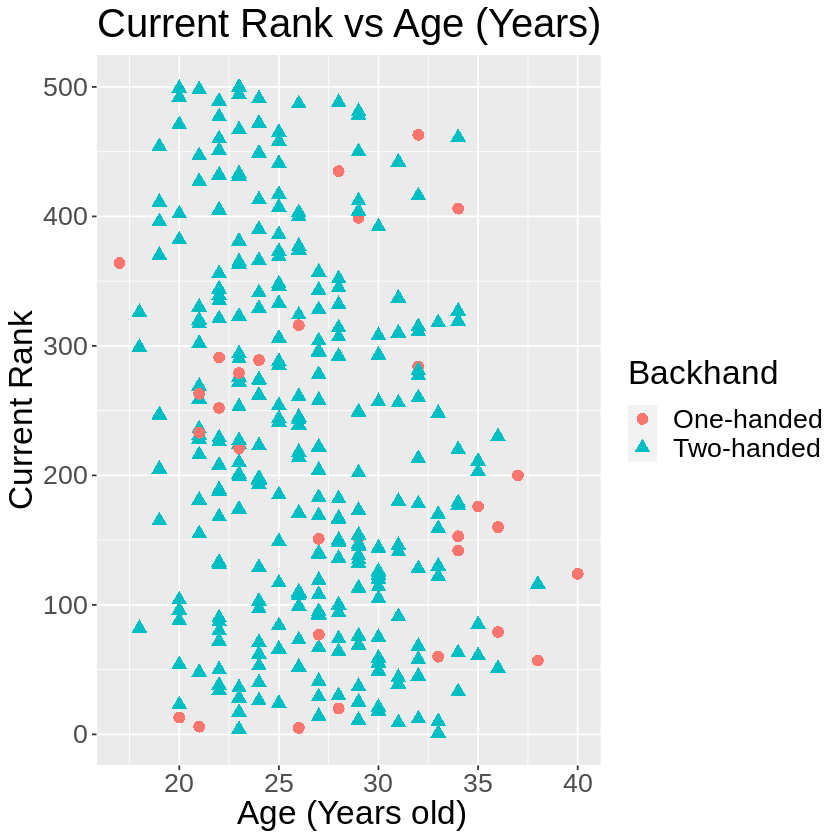

Warning message:
“Removed 16 rows containing missing values (geom_point).”


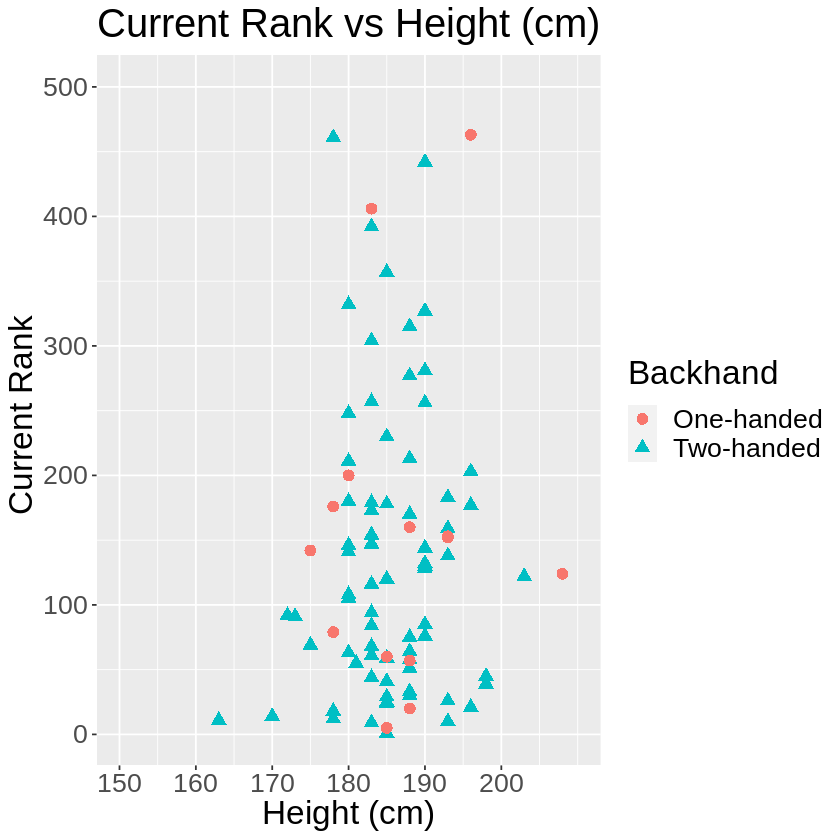

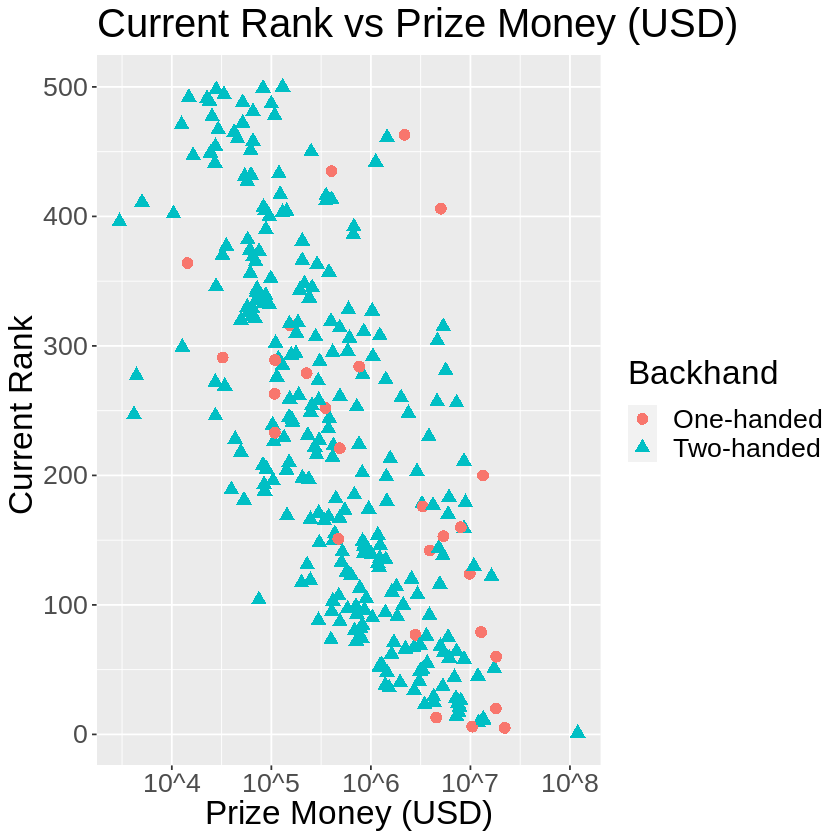

In [9]:
### color and label shape by backhandedness

age_vs_rank_backhand <- tennis_train|>
                        filter(Backhand != "NA") |>
                        ggplot( aes(x = Age,
                                                 y = Current.Rank, 
                                                 color = Backhand,
                                                shape = Backhand)) +
  geom_point(alpha = 1, size = 3) +
  labs(x = " Age (Years old)", y = "Current Rank") +
  ggtitle("Current Rank vs Age (Years)") +
  theme(text = element_text(size = 20)) 
age_vs_rank_backhand

height_vs_rank_backhand <-tennis_train|>
                        filter(Backhand != "NA") |>
                                ggplot( aes(x = Height, 
                                           y = Current.Rank,
                                           color = Backhand,
                                           shape = Backhand)) +
  geom_point(alpha = 1, size = 3) +
  labs(x = "Height (cm)", y = "Current Rank ") +
  ggtitle("Current Rank vs Height (cm)") +
  theme(text = element_text(size = 20)) +
  scale_x_continuous(limits = c(150, 210), breaks = seq(150, 200, by = 10))

height_vs_rank_backhand



prize_vs_rank_backhand <- tennis_train|>
                        filter(Backhand != "NA") |>
                        ggplot(aes(x = Prize.Money,
                                          y = Current.Rank,
                                          color = Backhand,
                                          shape = Backhand)) +
  geom_point(alpha = 1,   
             size = 3,) +
  labs(x = "Prize Money (USD)", y = "Current Rank ") +
  ggtitle("Current Rank vs Prize Money (USD)") +
  scale_x_log10(labels = function(x) sprintf("10^%d", log10(x)), breaks = c(1e3, 1e4, 1e5, 1e6, 1e7, 1e8)) +
  theme(text = element_text(size = 20))

prize_vs_rank_backhand

It can be observe that there is no particular pattern that implicate the relationship between backhandness and current rank.

In [10]:
## Create a new sub dataset focusing on the top 10 most popular country
top_10_country <- tennis_train |>
    select(Age, Current.Rank, Country) |>
    group_by(Country) |>
    summarise(count = n()) |>
    arrange(desc(count)) |>
    slice(1:10)
top_10_country

# Create a vector of allowed countries
allowed_countries <- c("United", "France", "Italy", "Germany", "Spain", "Argentina", "Australia", "Japan", "Russian", "Brazil")

# Mutate the Country column to "Others" if it's not in the allowed_countries vector
country_data <- tennis_train |>
  mutate(Country = factor(if_else(Country %in% allowed_countries, Country, factor("Others")))) #other country that are not in top 10 will be label as Others

country_data

Country,count
<fct>,<int>
United,37
France,34
Italy,31
Germany,26
Spain,25
Argentina,22
Australia,21
Japan,16
Russian,11


Warning message in `[<-.factor`(`*tmp*`, i, value = structure(1L, .Label = "Others", class = "factor")):
“invalid factor level, NA generated”


Prize.Money,Age,Country,Plays,Backhand,Height,Current.Rank
<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
74927,20,NA,Right-handed,Two-handed,NA,104
NA,23,Russian,Right-handed,Two-handed,NA,4
1285541,20,NA,Right-handed,Two-handed,NA,54
2722314,22,United,Right-handed,Two-handed,NA,34
11912152,32,United,Right-handed,Two-handed,198,45
⋮,⋮,⋮,⋮,⋮,⋮,⋮
354975,32,NA,Right-handed,Two-handed,NA,416
57943,20,France,Right-handed,Two-handed,NA,382
NA,23,NA,Left-handed,NA,NA,495


Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 180 rows containing missing values (geom_point).”


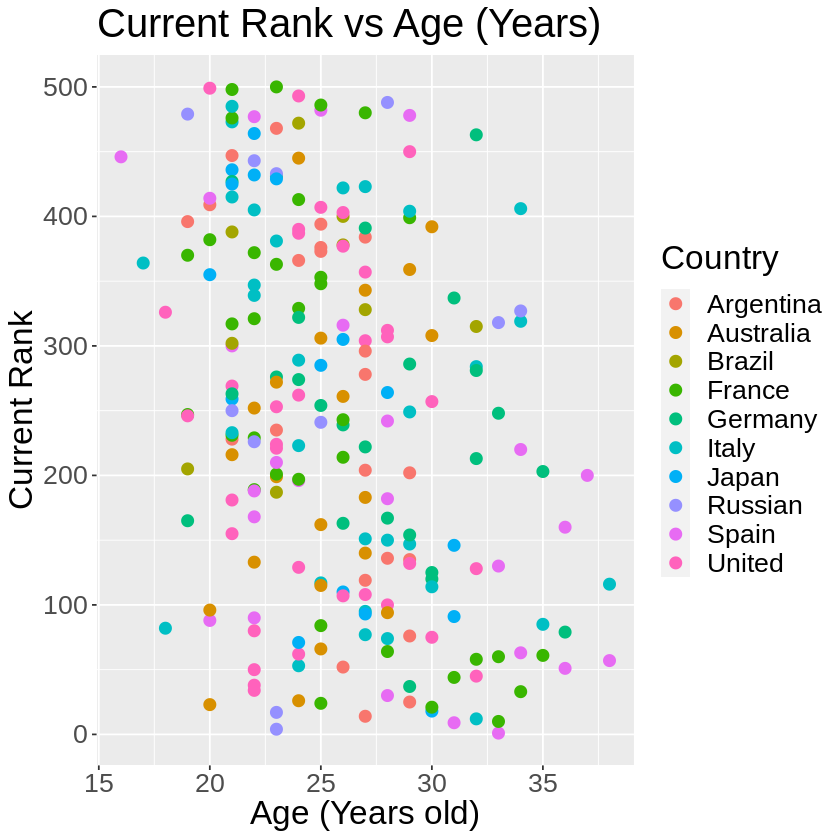

Warning message:
“Removed 55 rows containing missing values (geom_point).”


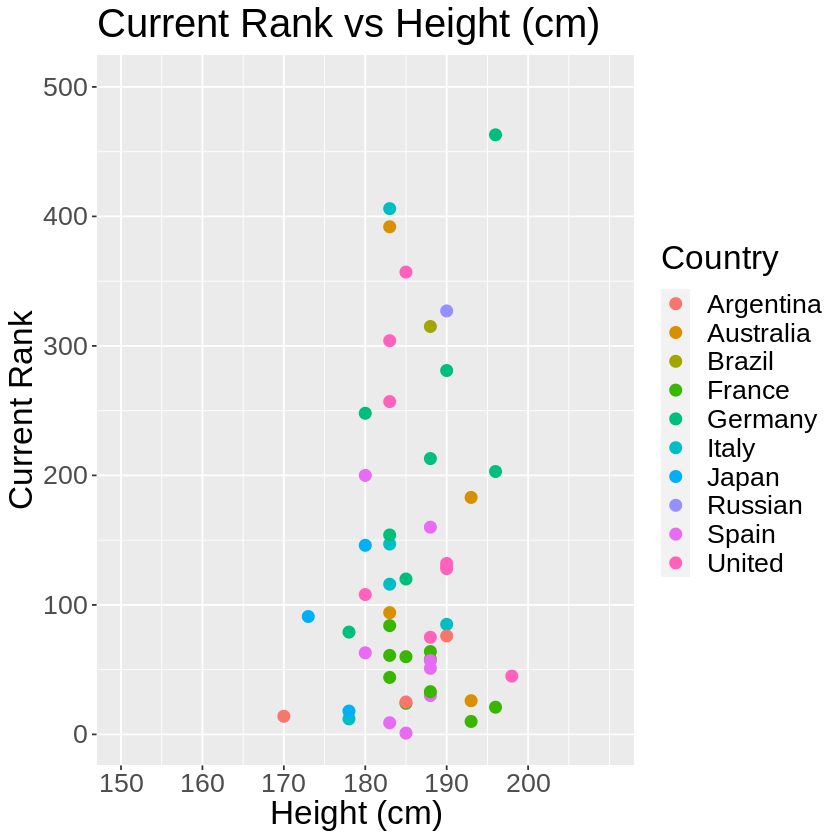

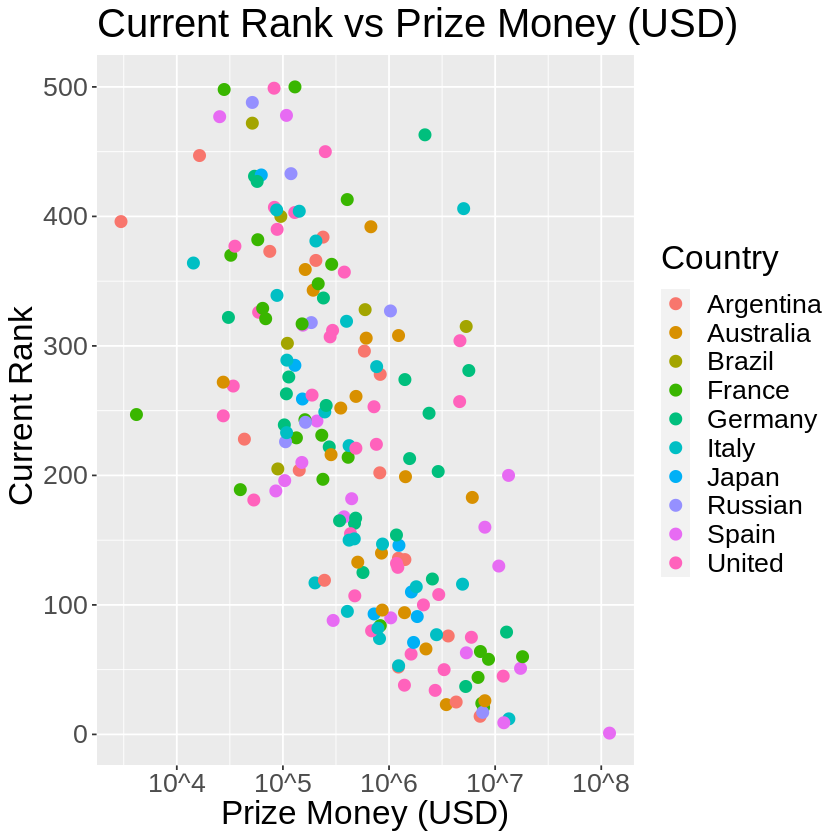

In [11]:
### color and label shape by Country

age_vs_rank_country <- country_data|>
                        filter(Country != "NA")|>
                        ggplot( aes(x = Age,
                                y = Current.Rank, 
                                color = Country)) +
  geom_point(alpha = 1, size = 3) +
  labs(x = "Age (Years old)", y = "Current Rank") +
  ggtitle("Current Rank vs Age (Years)") +
  theme(text = element_text(size = 20)) 


height_vs_rank_country <- country_data|>
                            filter(Country != "NA")|>
                            ggplot(aes(x = Height, 
                                           y = Current.Rank,
                                           color = Country)) +
  geom_point(alpha = 1, size = 3) +
  labs(x = "Height (cm)  ", y = "Current Rank") +
  ggtitle("Current Rank vs Height (cm)") +
  theme(text = element_text(size = 20)) +
  scale_x_continuous(limits = c(150, 210), breaks = seq(150, 200, by = 10))

prize_vs_rank_country <- country_data|>
                            filter(Country != "NA")|>
                            ggplot(aes(x = Prize.Money,
                                          y = Current.Rank,
                                          color = Country)) +
  geom_point(alpha = 1,   
             size = 3,) +
  labs(x = "Prize Money (USD)", y = " Current Rank") +
  ggtitle("Current Rank vs Prize Money (USD)") +
  scale_x_log10(labels = function(x) sprintf("10^%d", log10(x)), breaks = c(1e3, 1e4, 1e5, 1e6, 1e7, 1e8)) +
  theme(text = element_text(size = 20))
                

age_vs_rank_country
height_vs_rank_country
prize_vs_rank_country

There is no particular pattern that show the relationship between country and current rank.

Warning message:
“Removed 252 rows containing missing values (geom_point).”


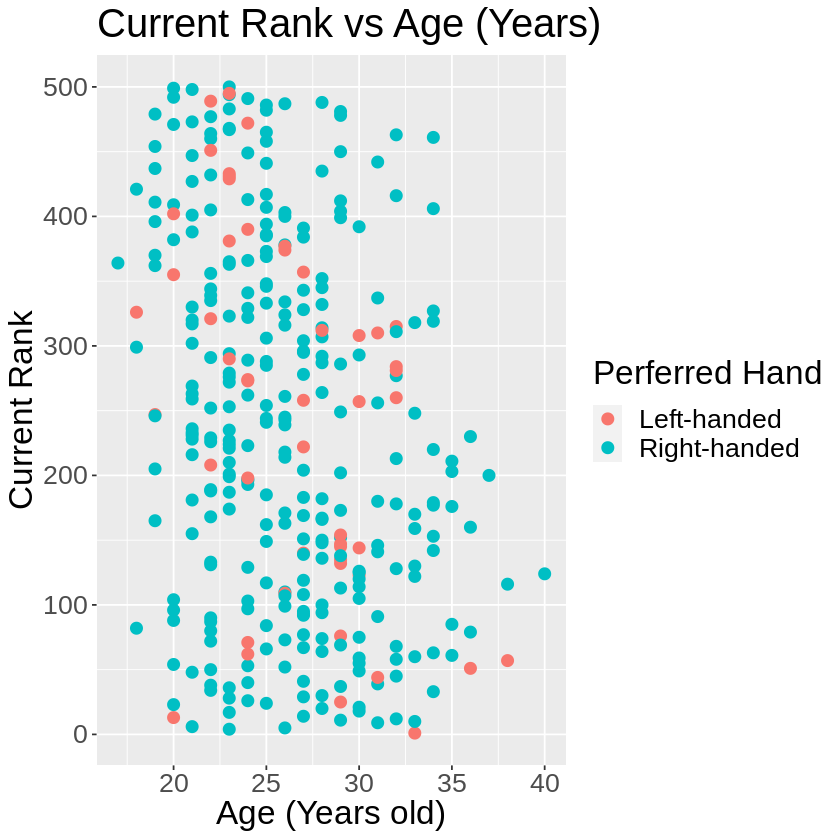

Warning message:
“Removed 42 rows containing missing values (geom_point).”


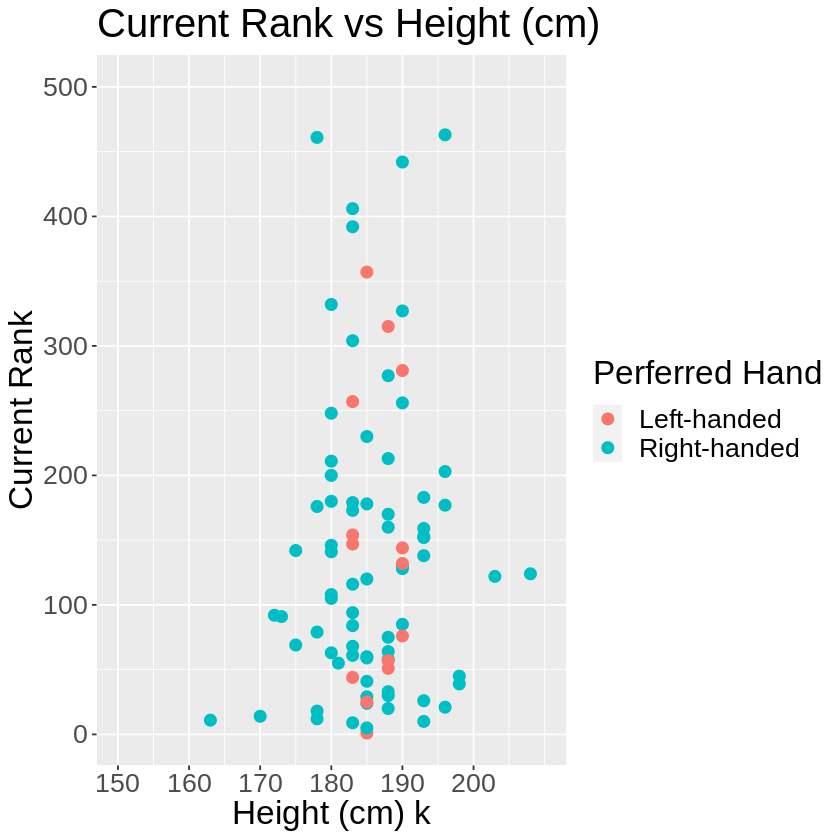

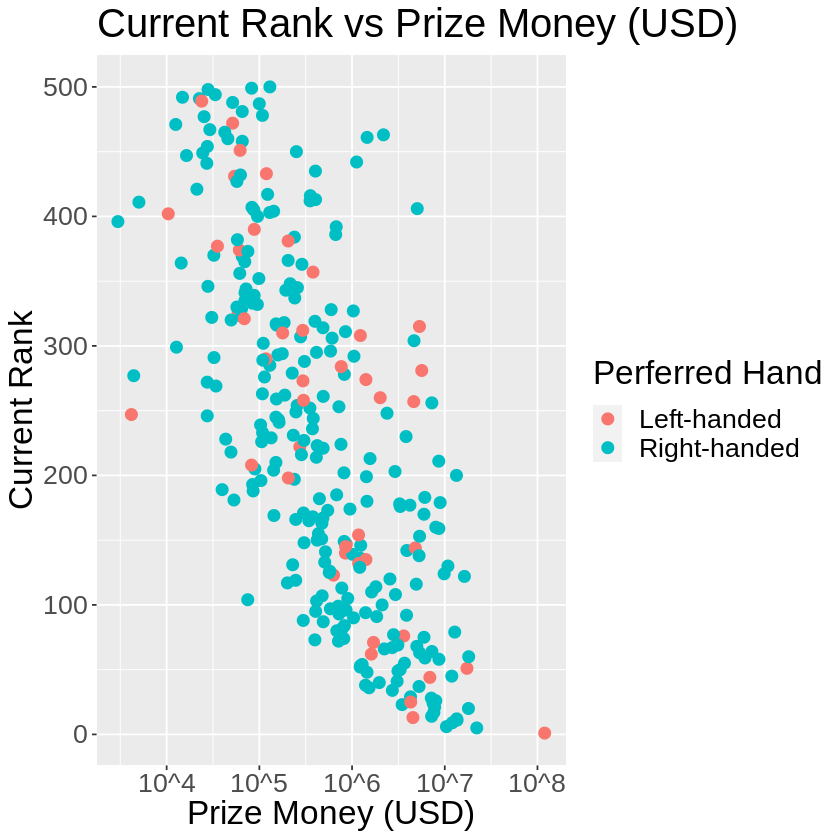

In [15]:
#coloring by preferred hand
age_vs_rank_hand <- tennis_train|>
                        filter(Plays != "NA") |>
                                    ggplot( aes(x = Age,
                                            y = Current.Rank, 
                                            color = Plays)) +
  geom_point(alpha = 1, size = 3) +
  labs(x = "Age (Years old)", y = "Current Rank", color = "Perferred Hand") +
  ggtitle("Current Rank vs Age (Years)") +
  theme(text = element_text(size = 20)) 
age_vs_rank_hand

height_vs_rank_hand <- tennis_train|>
                        filter(Plays != "NA") |>
                        ggplot( aes(x = Height, 
                                           y = Current.Rank,
                                           color = Plays)) +
  geom_point(alpha = 1, size = 3) +
  labs(x = "Height (cm) k", y = "Current Rank", color = "Perferred Hand") +
  ggtitle("Current Rank vs Height (cm)") +
  theme(text = element_text(size = 20)) +
  scale_x_continuous(limits = c(150, 210), breaks = seq(150, 200, by = 10))

height_vs_rank_hand



prize_vs_rank_hand <- tennis_train|>
                        filter(Plays != "NA") |>
                        ggplot(aes(x = Prize.Money,
                                          y = Current.Rank,
                                          color = Plays)) +
  geom_point(alpha = 1,   
             size = 3,) +
  labs(x = "Prize Money (USD)", y = "Current Rank", color = "Perferred Hand") +
  ggtitle("Current Rank vs Prize Money (USD)") +
  scale_x_log10(labels = function(x) sprintf("10^%d", log10(x)), breaks = c(1e3, 1e4, 1e5, 1e6, 1e7, 1e8)) +
  theme(text = element_text(size = 20))

prize_vs_rank_hand

There is no pattern showing the relationship between the current rank and perferred hand

Since there is no correlation between current rank, and country, backhandness or perferred hand, we would ignore these variable and choose the age, height, and prize money to be our variable of interest

### Methods
For this analysis, we will use the player’s age, height, and prize money earned. These choices of predictor variable are made base on our preliminary data analysis, as the other interested variables did not display any relationship (country, handness, backhandness, etc). On the other hand, the main reason that we choose our 3 variables (age, height, and prize money earned) is because we found that there are possibly a relationship between them and the current rank.

For our method of analysis, we will first isolate these variables and clean up the data. Then we will visualize the data using methods that we have learned over the course so far. From there one, we can model and tune our predictions so that it is acceptably accurate by using five-fold cross-validation and focusing on the RMPSE value. Since we are using numerical variables (age, height, and prize money) to predict another numerical variable (prize money earned), we will use the K-nearest neighbors regression. This model also work well on multiple predictors, and we can use a 3D plot to display the relationship found between the current rank and all of our variable, and the predicted rank.

Since we are visualizing the distribution and relation between many variables, we should use a scatterplot to correctly represent the data in order for us to have a good understanding of the relation between the different variables. We are prioritising a 2D plot over a 3D plot because it is more commonly viewed. We will also use a line graph to highlight the predicted values, so that the viewer can easily visualize the RMSE values.

### Expected outcomes and significance:

What do you expect to find?

What impact could such findings have?

What future questions could this lead to?

By using the k-nearest-neightbor regression algorithm, 